https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones/kernels?sortBy=voteCount&group=everyone&pageSize=20&datasetId=226

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

from zipfile import ZipFile
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn import  grid_search

ImportError: cannot import name 'grid_search' from 'sklearn' (D:\Anaconda3\lib\site-packages\sklearn\__init__.py)

# Feature selection and Hypertuning SVM

In [24]:
# Read Train and Test Dataset

In [57]:
df_train = pd.read_csv('https://disk.bg/s/UFQtiaqlTDj2SZX/download')  ### train data load
df_test = pd.read_csv('https://disk.bg/s/VYmtGL4lzcHdcCl/download')

In [60]:
df_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [27]:
print('shape train :',df_train.shape )
print('shape test_data:',df_test.shape )

shape train : (7352, 563)
shape test_data: (2947, 563)


In [29]:
df_train.isnull().values.any()
df_test.isnull().values.any()

False

In [30]:
#### Removed uncesarry column 

In [33]:
df_train.var().tail(5)

angle(tBodyGyroJerkMean,gravityMean)     0.228460
angle(X,gravityMean)                     0.261946
angle(Y,gravityMean)                     0.088494
angle(Z,gravityMean)                     0.077909
subject                                 80.553185
dtype: float64

In [34]:
df_train['subject'].unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30], dtype=int64)

### Based on the Domain knowledge- knowing that subject column does not affect the prediction variable it is removed

In [35]:
# Subject col not usefull hence dropped
if('subject' in df_train.columns):
    df_train.drop('subject', axis =1, inplace=True)
if('subject' in df_test.columns):
    df_test.drop('subject', axis =1, inplace=True)

### description from kaggle

Description of experiment
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

Attribute information
For each record in the dataset the following is provided:

Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.

Triaxial Angular velocity from the gyroscope.

A 561-feature vector with time and frequency domain variables.

Its activity label.

An identifier of the subject who carried out the experiment.

NameError: name 'preprocessing' is not defined

### PCA -


In [51]:
df_train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

#### Unique column maybe wich have to be predict

In [62]:
# Split into features and class
df_traindata, df_trainlabel = df_train.iloc[:, 0:len(df_train.columns) - 1], df_train.iloc[:, -1]
df_testdata, df_testlabel = df_test.iloc[:, 0:len(df_test.columns) -1], df_test.iloc[:, -1]


0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
5               STANDING
6               STANDING
7               STANDING
8               STANDING
9               STANDING
10              STANDING
11              STANDING
12              STANDING
13              STANDING
14              STANDING
15              STANDING
16              STANDING
17              STANDING
18              STANDING
19              STANDING
20              STANDING
21              STANDING
22              STANDING
23              STANDING
24              STANDING
25              STANDING
26              STANDING
27               SITTING
28               SITTING
29               SITTING
              ...       
7322    WALKING_UPSTAIRS
7323    WALKING_UPSTAIRS
7324    WALKING_UPSTAIRS
7325    WALKING_UPSTAIRS
7326    WALKING_UPSTAIRS
7327    WALKING_UPSTAIRS
7328    WALKING_UPSTAIRS
7329    WALKING_UPSTAIRS
7330    WALKING_UPSTAIRS


In [56]:
### # get dumies

In [58]:
df_train_dumies = pd.get_dummies(df_train, prefix=['Activity']).head()

# PCA

1.8317593446641899e-37
0.595811381756578


(array([558.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.83175934e-37, 1.19162276e-02, 2.38324553e-02, 3.57486829e-02,
        4.76649105e-02, 5.95811382e-02, 7.14973658e-02, 8.34135934e-02,
        9.53298211e-02, 1.07246049e-01, 1.19162276e-01, 1.31078504e-01,
        1.42994732e-01, 1.54910959e-01, 1.66827187e-01, 1.78743415e-01,
        1.90659642e-01, 2.02575870e-01, 2.14492097e-01, 2.26408325e-01,
        2.38324553e-01, 2.50240780e-01, 2.62157008e-01, 2.74073236e-01,
        2.85989463e-01, 2.97905691e-01, 3.09821919e-01, 3.21738146e-01,
        3.33654374e-01, 3.45570601e-01, 3.57486829e-01, 3.69403057e-01,
        3.81319284e-01, 3.93235512e-01, 4.05151740e-01, 4.17067967e-01,
        4.

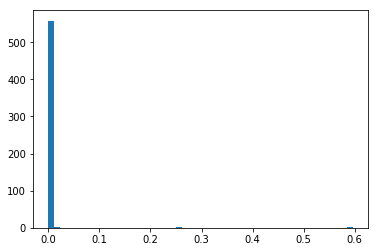

In [74]:
pca = PCA()
pca_traindata = pca.fit(df_traindata)
variacce = pca_traindata.explained_variance_ratio_ 
print(variacce.min())
print(variacce.max())
plt.hist(variacce,bins=50)

(array([560.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.]),
 array([1.83175934e-37, 3.97207588e-02, 7.94415176e-02, 1.19162276e-01,
        1.58883035e-01, 1.98603794e-01, 2.38324553e-01, 2.78045311e-01,
        3.17766070e-01, 3.57486829e-01, 3.97207588e-01, 4.36928347e-01,
        4.76649105e-01, 5.16369864e-01, 5.56090623e-01, 5.95811382e-01]),
 <a list of 15 Patch objects>)

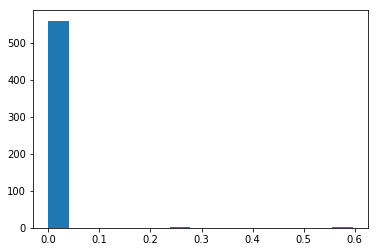

In [76]:
variacce
plt.hist(variacce,bins=15)

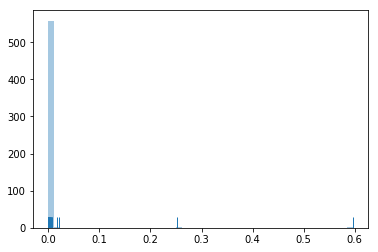

In [80]:
sns.distplot(variacce, bins=50, kde=False, rug=True);

AttributeError: 'PCA' object has no attribute 'trasnform'